# 指定作業:波士頓房價

In [99]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [100]:
from sklearn.datasets import load_boston

In [101]:
boston_dataset= load_boston()

In [102]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [103]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [104]:
boston= pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston['MEDV']=boston_dataset.target

In [105]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 原本的預測

In [106]:
X=boston.loc[:,'CRIM':'LSTAT'].values
Y=boston.MEDV

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [108]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [109]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
y_predict=model.predict(x_test)

In [111]:
import seaborn as sns 
sns.set()

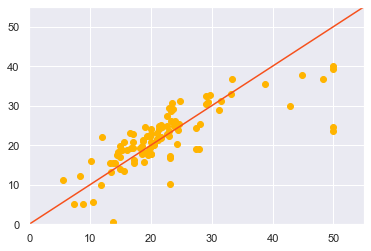

In [112]:
plt.scatter(y_test,y_predict,c='#FFB400')
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'#F6511D')

## 以下變項為我在波士頓買房較為重視的因素，故用此來做回歸分析
* CRIM
* CHAS
* NOX
* AGE
* DIS 



In [91]:
data = boston[['CRIM','CHAS','NOX','AGE','DIS','MEDV']]
data.head()

,CRIM,CHAS,NOX,AGE,DIS,MEDV
0,0.00632,0.0,0.538,65.2,4.0900,24.0
1,0.02731,0.0,0.469,78.9,4.9671,21.6
2,0.02729,0.0,0.469,61.1,4.9671,34.7
3,0.03237,0.0,0.458,45.8,6.0622,33.4
4,0.06905,0.0,0.458,54.2,6.0622,36.2


## 訓練資料

In [92]:
X=data.loc[:,'CRIM':'DIS'].values
Y=data.MEDV

In [93]:
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

#### step.1開一台函數學習機


In [94]:
model=LinearRegression()

#### step.2 訓練

In [95]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### step.3 預測

In [96]:
y_predict=model.predict(x_test)

In [97]:
import seaborn as sns 
sns.set()

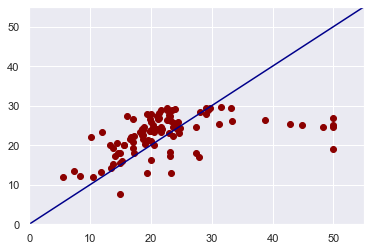

In [98]:
plt.scatter(y_test,y_predict,c='DarkRed')
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'DarkBlue')